In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = sm.datasets.macrodata.load().data

df['realinv'] = round(df['realinv'].astype('float32'), 2)
df['realdpi'] = round(df['realdpi'].astype('float32'), 2)

df_mod = df[['realinv','realdpi']]

''

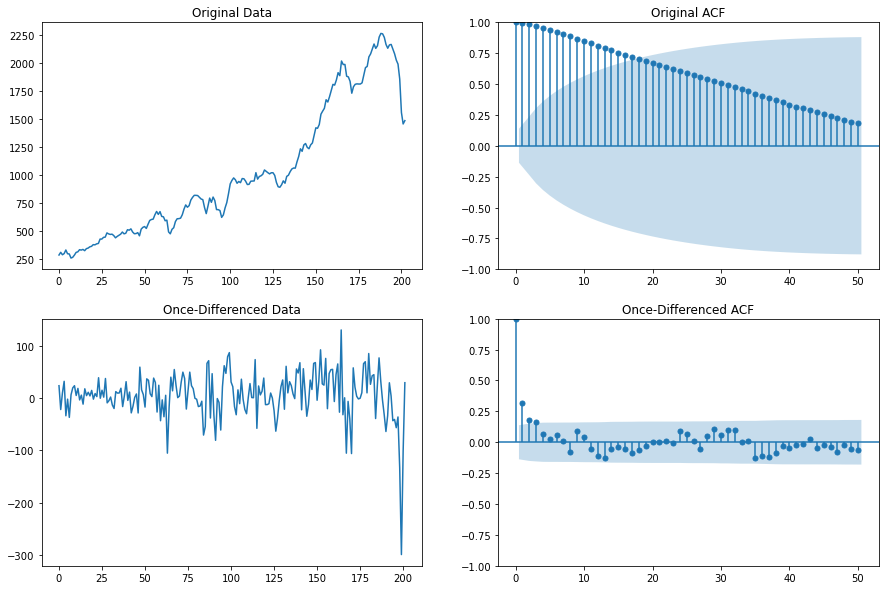

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(2,2, figsize=(15,10))
plot_acf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[0,1])
ax[0,1].set_title('Original ACF')
ax[0,0].set_title('Original Data')
ax[0,0].plot(df_mod['realinv'])
plot_acf(np.diff(df_mod['realinv'], n=1), alpha=0.05, lags=50, ax=ax[1,1])
ax[1,1].set_title('Once-Differenced ACF')
ax[1,0].set_title('Once-Differenced Data')
ax[1,0].plot(np.diff(df_mod['realinv'], n=1))
;
# plt.savefig('DifferencingInv.png', dpi=300, facecolor='w', bbox_inches = "tight");

''

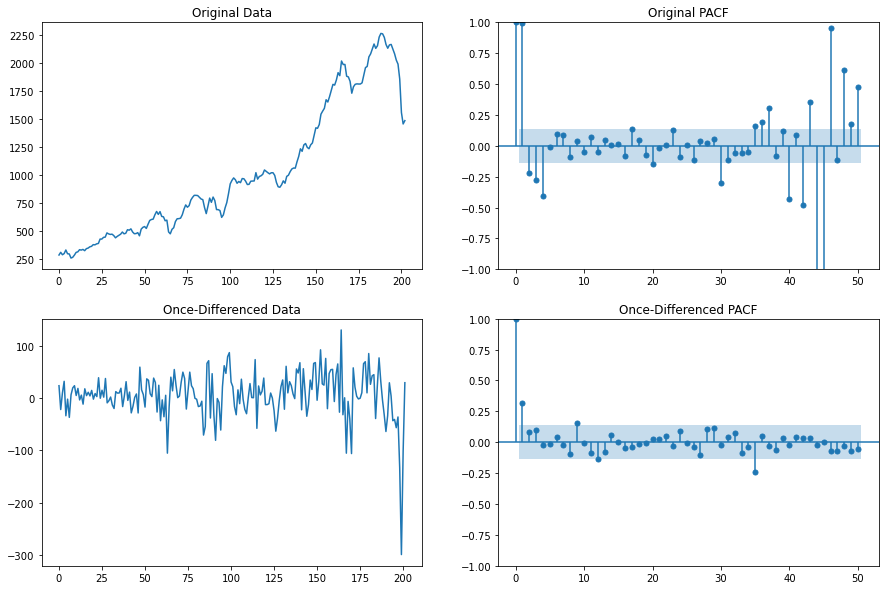

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].set_title('Original Data')
ax[0,0].plot(df_mod['realinv'])
plot_pacf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[0,1])
ax[0,1].set_title('Original PACF')

ax[1,0].set_title('Once-Differenced Data')
ax[1,0].plot(np.diff(df_mod['realinv'], n=1))
plot_pacf(np.diff(df_mod['realinv'], n=1), alpha=0.05, lags=50, ax=ax[1,1])
ax[1,1].set_title('Once-Differenced PACF')
;
# plt.savefig('DifferencingInvPACF.png', dpi=300, facecolor='w', bbox_inches = "tight");

''

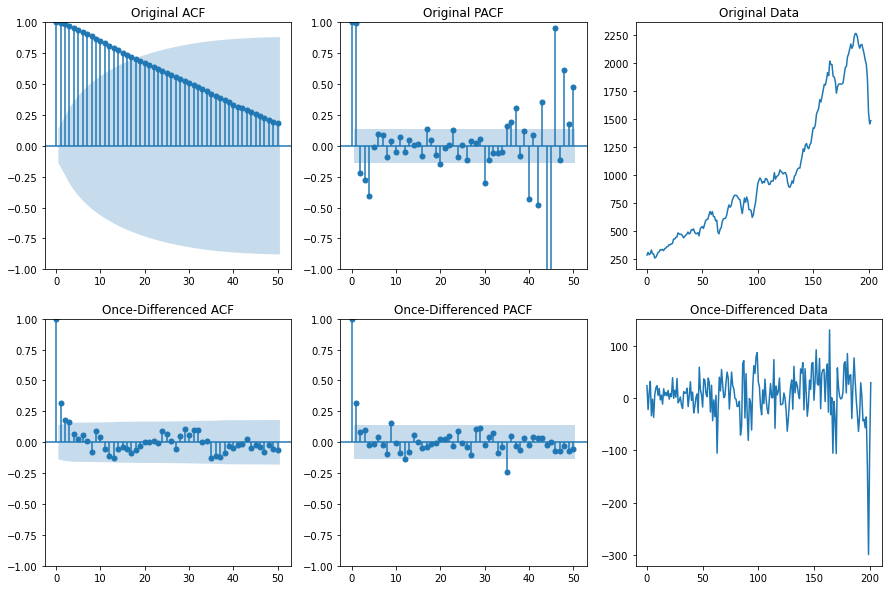

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(2,3, figsize=(15,10))
plot_acf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[0,0])
ax[0,0].set_title('Original ACF')
plot_pacf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[0,1])
ax[0,1].set_title('Original PACF')
ax[0,2].set_title('Original Data')
ax[0,2].plot(df_mod['realinv'])
plot_acf(np.diff(df_mod['realinv'], n=1), alpha=0.05, lags=50, ax=ax[1,0])
ax[1,0].set_title('Once-Differenced ACF')
plot_pacf(np.diff(df_mod['realinv'], n=1), alpha=0.05, lags=50, ax=ax[1,1])
ax[1,1].set_title('Once-Differenced PACF')
ax[1,2].set_title('Once-Differenced Data')
ax[1,2].plot(np.diff(df_mod['realinv'], n=1))
;
# plt.savefig('DifferencingInv.png', dpi=300, facecolor='w', bbox_inches = "tight");

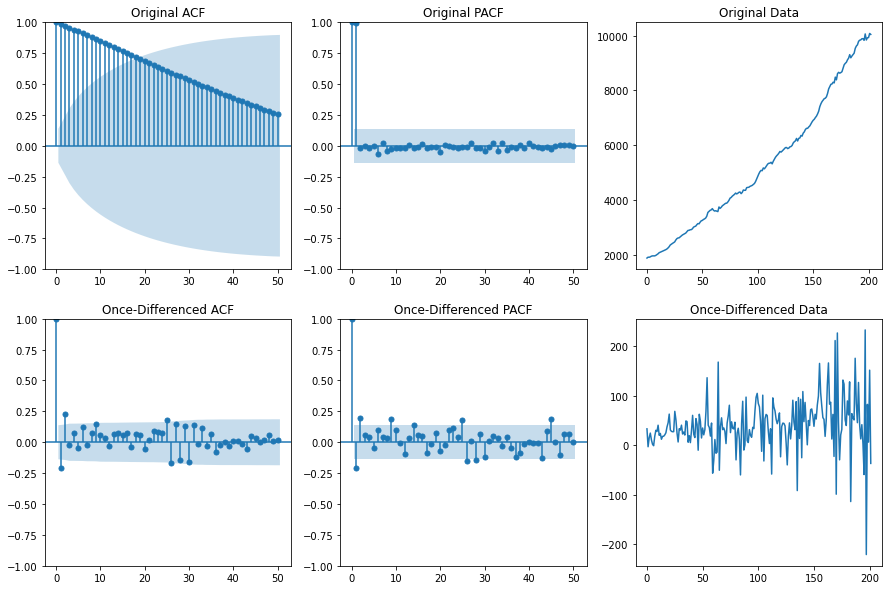

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(2,3, figsize=(15,10))
plot_acf(df_mod['realdpi'], alpha=0.05, lags=50, ax=ax[0,0])
ax[0,0].set_title('Original ACF')
plot_pacf(df_mod['realdpi'], alpha=0.05, lags=50, ax=ax[0,1])
ax[0,1].set_title('Original PACF')
ax[0,2].set_title('Original Data')
ax[0,2].plot(df_mod['realdpi'])
plot_acf(np.diff(df_mod['realdpi'], n=1), alpha=0.05, lags=50, ax=ax[1,0])
ax[1,0].set_title('Once-Differenced ACF')
plot_pacf(np.diff(df_mod['realdpi'], n=1), alpha=0.05, lags=50, ax=ax[1,1])
ax[1,1].set_title('Once-Differenced PACF')
ax[1,2].set_title('Once-Differenced Data')
ax[1,2].plot(np.diff(df_mod['realdpi'], n=1))
;
# plt.savefig('DifferencingDPI.png', dpi=300, facecolor='w', bbox_inches = "tight");

''

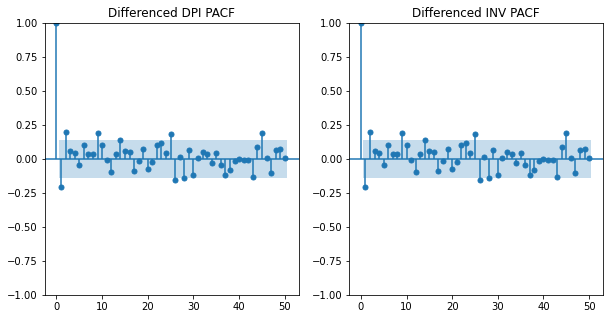

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_pacf(np.diff(df_mod['realdpi'], n=1), alpha=0.05, lags=50, ax=ax[0])
ax[0].set_title('Differenced DPI PACF')
plot_pacf(np.diff(df_mod['realdpi'], n=1), alpha=0.05, lags=50, ax=ax[1])
ax[1].set_title('Differenced INV PACF')
;
# plt.savefig('DifferencingPACF.png', dpi=300, facecolor='w', bbox_inches = "tight");

''

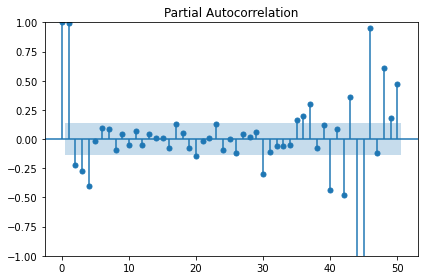

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

fig = plot_pacf(df_mod['realinv'], alpha=0.05, lags=50)
fig.tight_layout()
;
# plt.savefig('ACF.png', dpi=300, facecolor='w', bbox_inches = "tight");

# Ljung-Box White-Noise Variance Test

In [10]:
import numpy as np

random_white_noise = np.random.normal(loc=0, scale=1, size=1000)

''

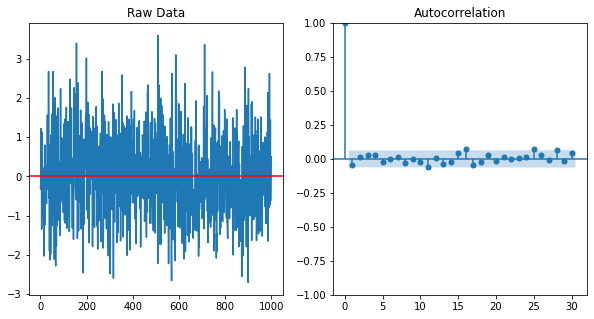

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].plot(random_white_noise)
ax[0].axhline(0, color='r')
ax[0].set_title('Raw Data')
plot_acf(random_white_noise, ax=ax[1])
;
# plt.savefig('Sample4LjungBox.png', dpi=300, facecolor='w', bbox_inches = "tight");

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(random_white_noise, lags=[50], return_df=True)

,lb_stat,lb_pvalue
50,57.104956,0.228027


# Cross-Correlation

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = sm.datasets.macrodata.load().data

df['realinv'] = round(df['realinv'].astype('float32'), 2)
df['realdpi'] = round(df['realdpi'].astype('float32'), 2)

df_mod = df[['realinv','realdpi']]

df_diff = pd.DataFrame()
df_diff['realinv'] = np.diff(df_mod['realinv'], n=1)
df_diff['realdpi'] = np.diff(df_mod['realdpi'], n=1)

In [14]:
df_mod.shape

(203, 2)

''

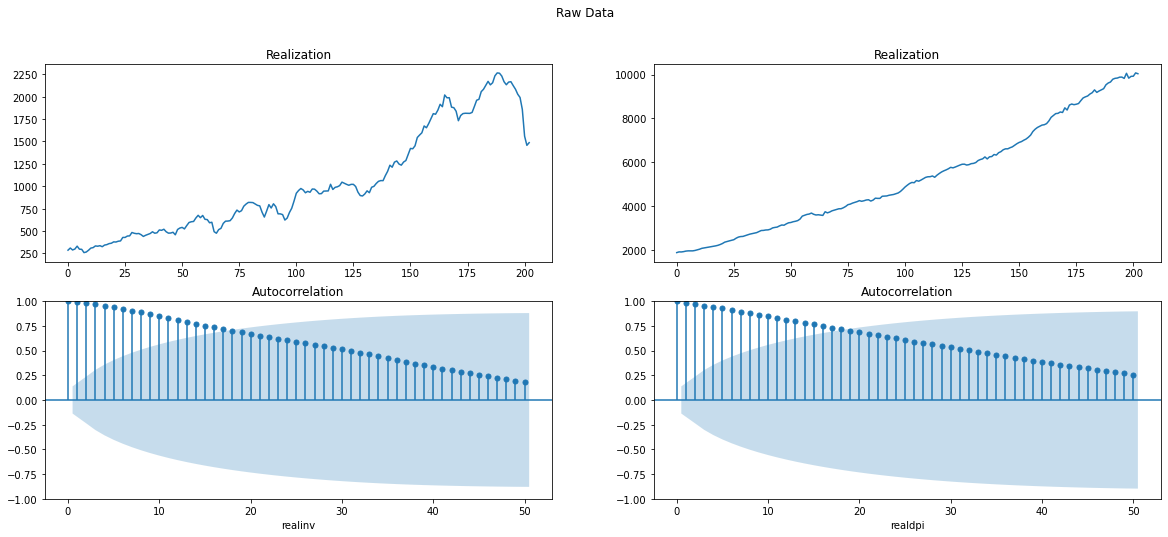

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(2,2, figsize=(20,8))
fig.suptitle('Raw Data')
ax[0,0].plot(df_mod['realinv'])
ax[0,0].set_title('Realization')
ax[1,0].set_xlabel('realinv')
ax[0,1].plot(df_mod['realdpi'])
ax[0,1].set_title('Realization')
ax[1,1].set_xlabel('realdpi')

plot_acf(df_mod['realinv'], alpha=0.05, lags=50, ax=ax[1,0])
plot_acf(df_mod['realdpi'], alpha=0.05, lags=50, ax=ax[1,1])
;
# plt.savefig('Raw Data.png', dpi=300, facecolor='w', bbox_inches = "tight");

In [16]:
df_diff = pd.DataFrame()
df_diff['realinv'] = np.diff(df_mod['realinv'], n=1)
df_diff['realdpi'] = np.diff(df_mod['realdpi'], n=1)

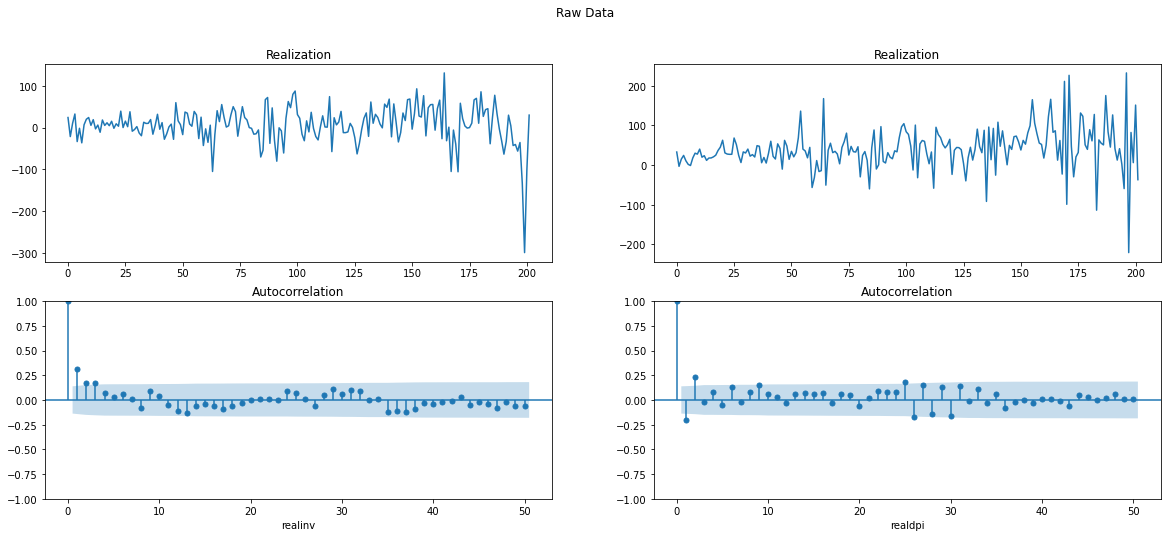

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(2,2, figsize=(20,8))
fig.suptitle('Raw Data')
ax[0,0].plot(df_diff['realinv'])
ax[0,0].set_title('Realization')
ax[1,0].set_xlabel('realinv')
ax[0,1].plot(df_diff['realdpi'])
ax[0,1].set_title('Realization')
ax[1,1].set_xlabel('realdpi')

plot_acf(df_diff['realinv'], alpha=0.05, lags=50, ax=ax[1,0])
plot_acf(df_diff['realdpi'], alpha=0.05, lags=50, ax=ax[1,1]);

# plt.savefig('First Difference.png', dpi=300, facecolor='w', bbox_inches = "tight");

## The statistical approach to cross-correlation

In [18]:
from scipy.signal import correlate
import matplotlib.pyplot as plt

def plot_ccf(data_a, data_b, lag_lookback, percentile):

    n = len(data_a)

    ccf = correlate(data_a - np.mean(data_a), data_b - np.mean(data_b), method='direct') / (np.std(data_a) * np.std(data_b) * n)

    _min = (len(ccf)-1)//2 - lag_lookback
    _max = (len(ccf)-1)//2 + (lag_lookback-1)

    zscore_vals={90:1.645,
                 95:1.96,
                 99:2.576}

    plt.figure(figsize=(15, 5))

    markers, stems, baseline = plt.stem(np.arange(-lag_lookback,(lag_lookback-1)), ccf[_min:_max], markerfmt='o', use_line_collection = True)

    plt.setp(baseline, color='r', linewidth=1)
    baseline.set_xdata([0,1])
    baseline.set_transform(plt.gca().get_yaxis_transform())

    z_score_95pct = zscore_vals.get(percentile)/np.sqrt(n) #1.645 for 90%, 1.96 for 95%, and 2.576 for 99%

    plt.title('Cross-Correlation')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.axhline(y=-z_score_95pct, color='b', ls='--')# Z-statistic for 95% CL LL
    plt.axhline(y=z_score_95pct, color='b', ls='--')# Z-statistic for 95% CL UL
    plt.axvline(x=0, color='black', ls='-')
    ;

    # plt.savefig('CCF.png', dpi=300, facecolor='w', bbox_inches = "tight");

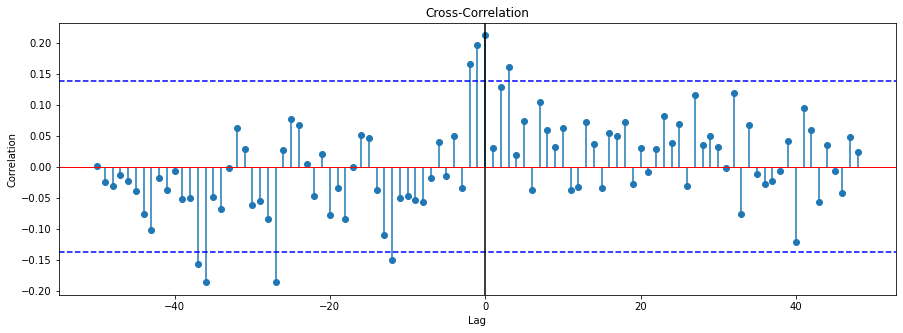

In [19]:
plot = plot_ccf(data_a=df_diff['realdpi'], data_b=df_diff['realinv'], lag_lookback=50, percentile=95)

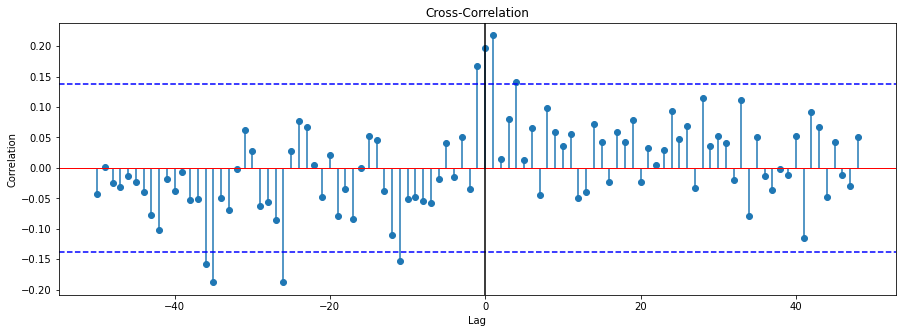

In [20]:
df_diff2 = pd.DataFrame()
df_diff2 = df_diff.copy()
plot = plot_ccf(data_a=df_diff['realdpi'].shift(1).iloc[1:], data_b=df_diff['realinv'].iloc[1:], lag_lookback=50, percentile=95)